In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_boston

boston = load_boston()
X = boston.data
Y = boston.target
X.shape

(506, 13)

In [3]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

•CRIM：城镇人均犯罪率。
•ZN：城镇超过 25,000 平方英尺的住宅区域的占地比例。
•INDUS： 城镇非零售用占地比例。
•CHAS ：是否靠近河边， l 为靠近，0 为远离。
•NO： 二氧化氮浓度。
•RM： 每套房产的平均房间个数。
•AGE： 1940 年之前就盖好，且业主自住的房子的比例。
•DIS： 与波士顿市中心的距离
•RAD： 周边高速公道的便利性指数。
•TAX： 10000 美元的财产税率。
•PTRATIO： 小学老师的比例 。
•B： 城镇黑人的比例。
•LSTAT：地位较低的人口比例。

In [4]:
#模型训练
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=3)

In [5]:
import time
from sklearn.linear_model import LinearRegression
model = LinearRegression()
start = time.clock()
model.fit(x_train,y_train)
reain_score = model.score(x_train,y_train)
cv_score = model.score(x_test,y_test)
print("elaspe:{0:6f};train_score:{1:0.6f};cv_score:{2:6f}".format(time.clock()-start,reain_score,cv_score))


elaspe:0.006497;train_score:0.723941;cv_score:0.795262


E:\Anaconda\envs\tf\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.
E:\Anaconda\envs\tf\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


In [6]:
#模型优化,  归一化处理(normalize=True),只会加快收敛速度，远不够
#model = LinearRegression(normalize=True)，还有就是增加多项式特征
#增加模型复杂度，编写创建多项式的函数
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

def polynomial_model(degree=1):
    polynomial_features = PolynomialFeatures(degree=degree,include_bias=False)
    linear_regression = LinearRegression(normalize=True)
    pipeline = Pipeline([("polynomial_features",polynomial_features),("linear_regression",linear_regression)])
    return pipeline

In [7]:
#二阶多项式来拟合数据
model = polynomial_model(degree=2)      #二阶多项式
start = time.clock()
model.fit(x_train,y_train)

train_score = model.score(x_train,y_train)
cv_score = model.score(x_test,y_test)
print('elaspe:{0:.6f};train_score:{1:.6f};cv_score:{2:.6f}'.format(time.clock()-start,train_score,cv_score))

elaspe:0.014409;train_score:0.930547;cv_score:0.860049


E:\Anaconda\envs\tf\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until
E:\Anaconda\envs\tf\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


In [8]:
#把阶数改为三，出现训练样本为一，测试为﹣，模型过拟合了
model = polynomial_model(degree=3)      #二阶多项式
start = time.clock()
model.fit(x_train,y_train)

train_score = model.score(x_train,y_train)
cv_score = model.score(x_test,y_test)
print('elaspe:{0:.6f};train_score:{1:.6f};cv_score:{2:.6f}'.format(time.clock()-start,train_score,cv_score))

elaspe:0.051821;train_score:1.000000;cv_score:-106.360276


E:\Anaconda\envs\tf\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until
E:\Anaconda\envs\tf\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


E:\Anaconda\envs\tf\lib\site-packages\ipykernel_launcher.py:103: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


elapes:1.901691


E:\Anaconda\envs\tf\lib\site-packages\ipykernel_launcher.py:108: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


<Figure size 3600x800 with 0 Axes>

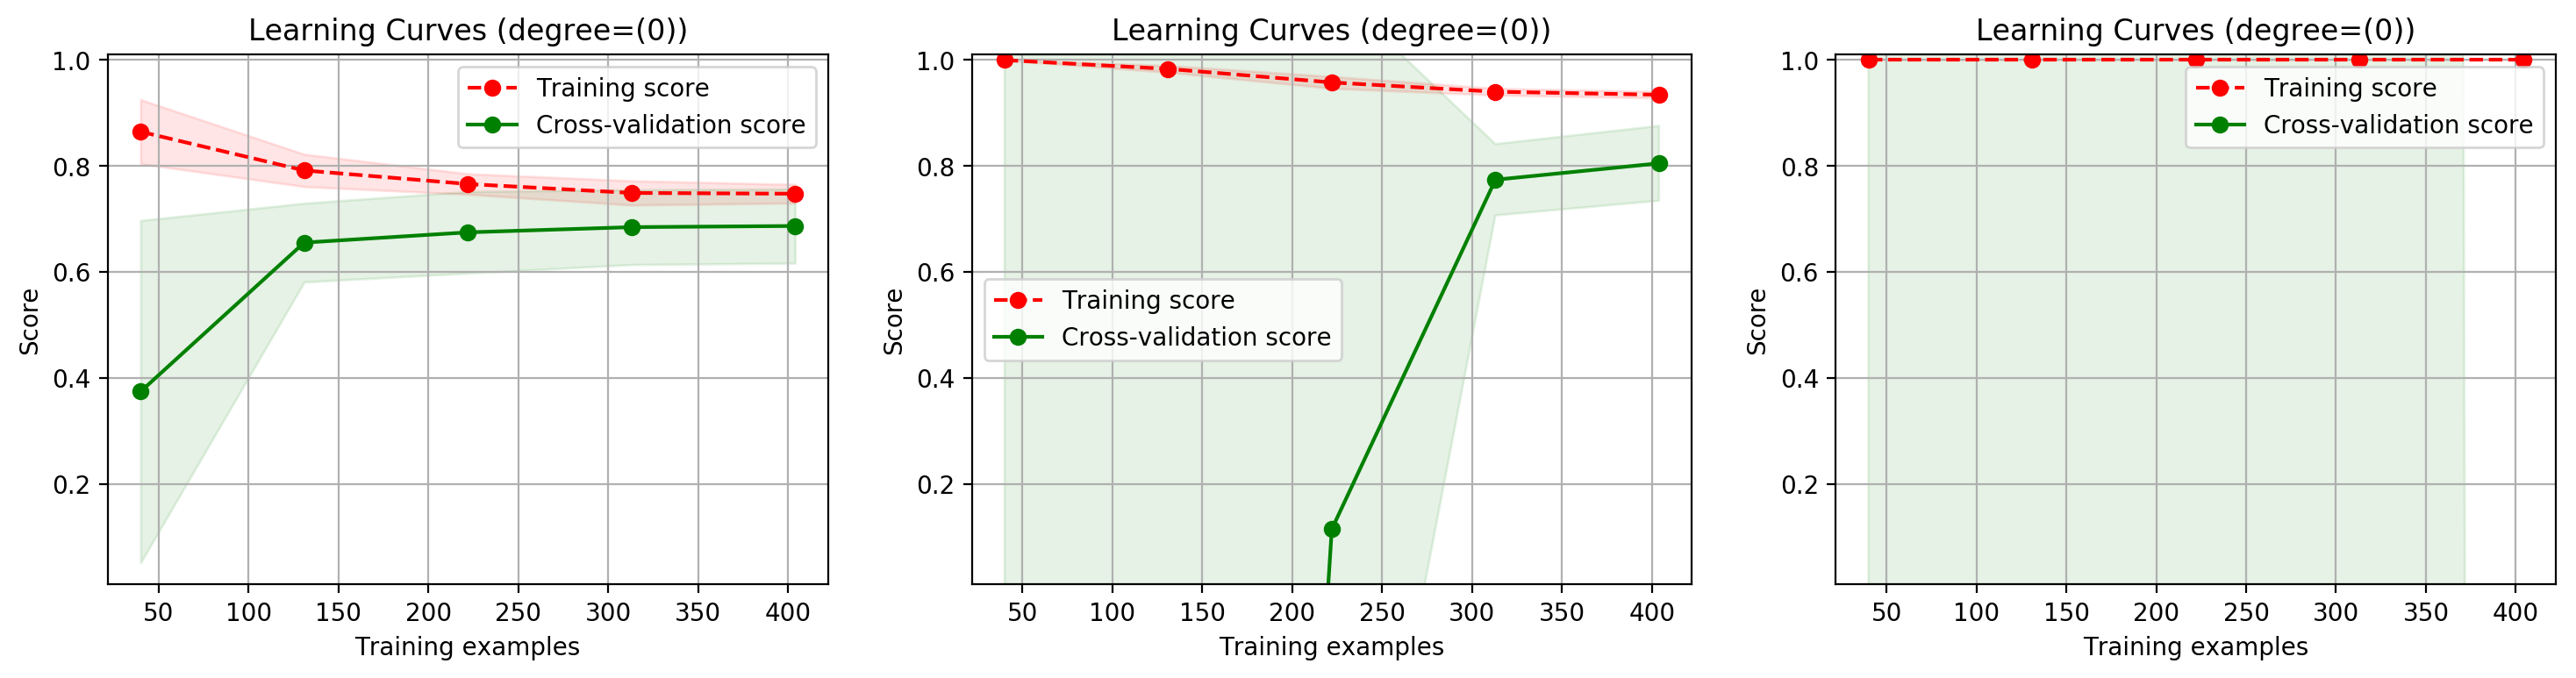

In [9]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(plt, estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o--', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

def plot_param_curve(plt, train_sizes, cv_results, xlabel):
    train_scores_mean = cv_results['mean_train_score']
    train_scores_std = cv_results['std_train_score']
    test_scores_mean = cv_results['mean_test_score']
    test_scores_std = cv_results['std_test_score']
    plt.title('parameters turning')
    plt.grid()
    plt.xlabel(xlabel)
    plt.ylabel('score')
    plt.fill_between(train_sizes, 
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, 
                     alpha=0.1, color="r")
    plt.fill_between(train_sizes, 
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, 
                     alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, '.--', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, '.-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt
#画学习曲线
from sklearn.model_selection import ShuffleSplit
#from common.utils import plot_learning_curve

cv = ShuffleSplit(n_splits=10,test_size=0.2,random_state=0)
plt.figure(figsize=(18,4),dpi=200)
title = 'Learning Curves (degree=(0))'
degrees = [1,2,3]
start = time.clock()
plt.figure(figsize=(18,4),dpi=200)
for i in range(len(degrees)):
    plt.subplot(1,3,i+1) 
    plot_learning_curve(plt,polynomial_model(degrees[i]),title.format(degrees[i]),X,Y,ylim=(0.01,1.01),cv=cv)
print('elapes:{0:.6f}'.format(time.clock()-start))